# 📊 Statistik Analiz - Kredit Satışları Proqnozu

**Məqsəd:** Kredit satışları məlumatlarının hərtərəfli statistik təhlili

**Tarix:** 2 Noyabr 2025

**Mündəricat:**
- Təsviri statistika
- Paylanma təhlili  
- Hipotez testləri
- Reqressiya diaqnostikası
- Zaman sıraları təhlili
- VIF və multikollinearlik
- Model müqayisəsi

## I. MƏLUMATLARIN YÜKLƏNMƏSI VƏ HAZIRLANMASI

### 🎯 Nəyə görə lazımdır?
İlk addım olaraq bütün lazımi kitabxanaları və məlumatları yükləməliyik. Bu, analiz üçün alətləri hazır vəziyyətə gətirir.

### 📋 Nə edirik?
1. **Pandas** - Məlumat təhlili üçün
2. **NumPy** - Riyazi əməliyyatlar üçün
3. **Matplotlib/Seaborn** - Qrafiklər üçün
4. **SciPy/Statsmodels** - Statistik testlər üçün

In [1]:
# Kitabxanaların yüklənməsi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, anderson
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Parametrlərin tənzimlənməsi
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Bütün kitabxanalar uğurla yükləndi")

✅ Bütün kitabxanalar uğurla yükləndi


### 📊 Nəticənin izahı:
Əgər "✅ Bütün kitabxanalar uğurla yükləndi" mesajını görsəniz, deməli hər şey qaydasındadır və analizə başlaya bilərik.

In [2]:
# Məlumatların yüklənməsi
df = pd.read_csv('data/ml_ready_data.csv')

print(f"📊 Məlumat ölçüsü: {df.shape[0]} sətir × {df.shape[1]} sütun")
print(f"\n🔍 İlk 5 müşahidə:")
df.head()

📊 Məlumat ölçüsü: 22 sətir × 29 sütun

🔍 İlk 5 müşahidə:


,Rüblər,Year,Quarter,Time_Index,Nağd_pul_kredit_satışı,GDP,Dövlət_Gəlirləri,Dövlət_Xərcləri,Əhalinin_nominal_gəlirləri,Əhalinin_banklardakı_əmanətləri,Orta_aylıq_əməkhaqqı,Xarici_ticarət_dövriyyəsi,İxrac,İdxal,Pul_bazası,Oil_Price,Tikinti-quraşdırma_işlərinə_sərf_edilmiş_vəsait,İstehlak_xərcləri,Yaşayış_evlərinin_tikintisinə_yönəldilmiş_investisiyalar,Mənzil_qiymətləri,Müştərilərə_verilmiş_kreditlər,NPLs,ROA,ROE,Net_Interest_Margin,Efficiency_Ratio,Loan-to-Deposit_Ratio,Müştəri_sayı,Uçot_faiz_dərəcəsi
0,2020 I,2020,1,0,46642.841,1.793e+07,7.811e+06,5.255e+06,1.344e+07,8.252e+06,0.745,1.138e+07,6.899e+06,4.483e+06,1.007e+07,8.575,1.964e+06,0.319,288706.6,1.224,359233.762,25.854,0.462,2.969,2.434,76.901,130.689,25304.0,7.25
1,2020 II,2020,2,1,15709.384,1.645e+07,4.212e+06,6.476e+06,1.394e+07,7.706e+06,0.720,8.593e+06,4.594e+06,3.999e+06,1.125e+07,4.988,2.031e+06,0.287,337427.2,1.224,349405.741,37.211,1.425,7.770,2.655,71.419,131.644,16316.0,7.00
2,2020 III,2020,3,2,51257.548,1.797e+07,5.942e+06,6.911e+06,1.423e+07,7.834e+06,0.707,1.034e+07,5.518e+06,4.818e+06,1.223e+07,7.304,2.206e+06,0.295,316308.8,1.223,366496.283,37.871,2.185,11.813,2.729,71.329,135.495,32598.0,6.50
3,2020 IV,2020,4,3,26391.998,2.023e+07,6.709e+06,7.775e+06,1.412e+07,8.178e+06,0.707,1.083e+07,5.888e+06,4.942e+06,1.356e+07,7.529,3.153e+06,0.298,424897.4,1.224,337946.336,26.704,3.094,16.588,2.627,73.659,123.698,28564.0,6.25
4,2021 I,2021,1,4,53293.774,1.918e+07,5.736e+06,5.524e+06,1.346e+07,8.148e+06,0.713,1.196e+07,7.661e+06,4.302e+06,1.332e+07,10.339,1.490e+06,0.308,205773.4,1.247,355393.135,39.607,0.951,5.080,2.588,71.084,125.431,39842.0,6.25


### 📊 Nəticənin izahı:
- **22 sətir** = 22 rüb məlumat (2020 Q1 - 2025 Q2)
- **29 sütun** = 29 dəyişən (GDP, Neft qiyməti, NPL, və s.)
- Cədvəl bizə məlumatların necə göründüyünü göstərir

## II. TƏSVİRİ STATİSTİKA

### 🎯 Nəyə görə lazımdır?
Məlumatlarımızı **ümumi şəkildə başa düşmək** üçün lazımdır. Ortalama, minimum, maksimum, dəyişkənlik kimi əsas xüsusiyyətləri öyrənirik.

### 📋 Nə ölçürük?
1. **Mean (Ortalama)** - Məlumatın mərkəzi
2. **Std (Standart sapma)** - Dəyişkənlik  
3. **CV (Variasiya əmsalı)** - Nisbi dəyişkənlik (%)
4. **Skewness (Asimmetriya)** - Sağa/sola əyilmə
5. **Kurtosis (Kurtosis)** - Quyruqların ağırlığı

In [3]:
# Əsas dəyişənlərin seçilməsi
key_vars = ['Nağd_pul_kredit_satışı', 'GDP', 'Oil_Price', 'NPLs', 'ROE', 'ROA', 
            'Net_Interest_Margin', 'Müştəri_sayı']

# Təsviri statistika
desc_stats = df[key_vars].describe().T
desc_stats['CV (%)'] = (desc_stats['std'] / desc_stats['mean']) * 100
desc_stats['Asimmetriya'] = df[key_vars].skew()
desc_stats['Kurtosis'] = df[key_vars].kurtosis()

print("="*120)
print(" "*45 + "📊 TƏSVİRİ STATİSTİKA")
print("="*120)
print(desc_stats.round(2))

# İzah
print("\n" + "="*120)
print("📌 İZAH:")
print("="*120)

for var in key_vars:
    cv = desc_stats.loc[var, 'CV (%)']
    skew = desc_stats.loc[var, 'Asimmetriya']
    
    print(f"\n🔹 {var}:")
    
    # Dəyişkənlik
    if cv > 50:
        print(f"   • Dəyişkənlik: YÜKSƏK (CV: {cv:.1f}%) - Məlumat çox dəyişir")
    elif cv > 20:
        print(f"   • Dəyişkənlik: ORTA (CV: {cv:.1f}%) - Normal dəyişkənlik")
    else:
        print(f"   • Dəyişkənlik: AŞAĞI (CV: {cv:.1f}%) - Sabit məlumat")
    
    # Simmetriya
    if skew > 0.5:
        print(f"   • Paylanma: SAƏA ƏYİLMİŞ - Az hallarda çox yüksək dəyərlər var")
    elif skew < -0.5:
        print(f"   • Paylanma: SOLA ƏYİLMİŞ - Az hallarda çox aşağı dəyərlər var")
    else:
        print(f"   • Paylanma: SİMMETRİK - Bərabər paylanmış")

                                             📊 TƏSVİRİ STATİSTİKA
                        count       mean        std        min        25%  \
Nağd_pul_kredit_satışı   22.0  8.061e+04  3.222e+04  1.571e+04  5.781e+04   
GDP                      22.0  2.777e+07  6.159e+06  1.645e+07  2.197e+07   
Oil_Price                22.0  1.274e+01  3.400e+00  4.990e+00  1.160e+01   
NPLs                     22.0  2.353e+01  9.820e+00  1.357e+01  1.628e+01   
ROE                      22.0  1.322e+01  7.540e+00  2.460e+00  7.790e+00   
ROA                      22.0  2.320e+00  1.370e+00  3.800e-01  1.310e+00   
Net_Interest_Margin      22.0  2.770e+00  2.600e-01  2.380e+00  2.580e+00   
Müştəri_sayı             22.0  9.882e+04  8.067e+04  1.632e+04  4.889e+04   

                              50%        75%        max  CV (%)  Asimmetriya  \
Nağd_pul_kredit_satışı  8.548e+04  1.048e+05  1.263e+05   39.97        -0.53   
GDP                     3.001e+07  3.219e+07  3.575e+07   22.18        -0.70   


### 📊 Nəticəni necə oxuyaq?

**Kredit Satışları (Hədəf dəyişən):**
- **Ortalama:** 80,613 mln AZN - Rüb üzrə orta satış
- **Min-Max:** 15,709 - 126,285 mln AZN - Böyük fərq!
- **CV: 40%** - Yüksək dəyişkənlik, kredit satışları sabit deyil

**CV (Variasiya əmsalı) nə deməkdir?**
- **<20%:** Aşağı dəyişkənlik - Sabit, proqnoz etmək asan
- **20-50%:** Orta dəyişkənlik - Normal
- **>50%:** Yüksək dəyişkənlik - Proqnoz etmək çətin

## III. NORMALlıq TESTLƏRİ

### 🎯 Nəyə görə lazımdır?
Bir çox statistik testlər məlumatın **normal paylanmasını** tələb edir. Normal paylanma zəng formasına bənzəyir - orta ətrafında konsentrasiya, kənarlarda az məlumat.

### 📋 Nə yoxlayırıq?
- **Shapiro-Wilk testi** - Ən güclü normallaşma testi (n<50 üçün)
- **Q-Q qrafiki** - Vizual yoxlama

### ⚖️ Qərar qaydası:
- **p-value > 0.05** → Normal paylanma ✅
- **p-value < 0.05** → Normal DEYIL ❌

In [4]:
print("="*120)
print(" "*45 + "🔍 NORMALlıq TESTLƏRİ")
print("="*120)
print("\nMəqsəd: Dəyişənlərin normal paylanıb-paylanmadığını yoxlamaq\n")

normality_results = []

for var in key_vars:
    data = df[var].dropna()
    
    # Shapiro-Wilk testi
    shapiro_stat, shapiro_p = shapiro(data)
    
    # Qərar
    is_normal = shapiro_p > 0.05
    
    normality_results.append({
        'Dəyişən': var,
        'p-value': shapiro_p,
        'Normal?': '✅ Bəli' if is_normal else '❌ Xeyr',
        'Nəticə': 'Normal paylanma' if is_normal else 'Normal deyil'
    })

normality_df = pd.DataFrame(normality_results)
print(normality_df.to_string(index=False))

print("\n" + "="*120)
print("💡 İZAH: p-value > 0.05 olduqda məlumat normal paylanıb")
print("="*120)

                                             🔍 NORMALlıq TESTLƏRİ

Məqsəd: Dəyişənlərin normal paylanıb-paylanmadığını yoxlamaq

               Dəyişən   p-value Normal?          Nəticə
Nağd_pul_kredit_satışı 2.557e-01  ✅ Bəli Normal paylanma
                   GDP 6.124e-03  ❌ Xeyr    Normal deyil
             Oil_Price 4.004e-01  ✅ Bəli Normal paylanma
                  NPLs 1.432e-03  ❌ Xeyr    Normal deyil
                   ROE 3.439e-01  ✅ Bəli Normal paylanma
                   ROA 2.735e-01  ✅ Bəli Normal paylanma
   Net_Interest_Margin 3.020e-01  ✅ Bəli Normal paylanma
          Müştəri_sayı 3.973e-04  ❌ Xeyr    Normal deyil

💡 İZAH: p-value > 0.05 olduqda məlumat normal paylanıb


### 📊 Nəticəni necə izah edək?

**Normal paylanma nədir?**
- Zəng forması (bell curve)
- Ortalama ətrafında simmetrik
- 68% məlumat ortalamadan ±1 standart sapma aralığında

**Əgər normal DEYILSƏ, problem var?**
- ❌ Problem YOX! Amma bəzi testlər istifadə oluna bilməz
- ✅ Həll: Parametrik olmayan testlər istifadə et (məs: Spearman korrelyasiya)

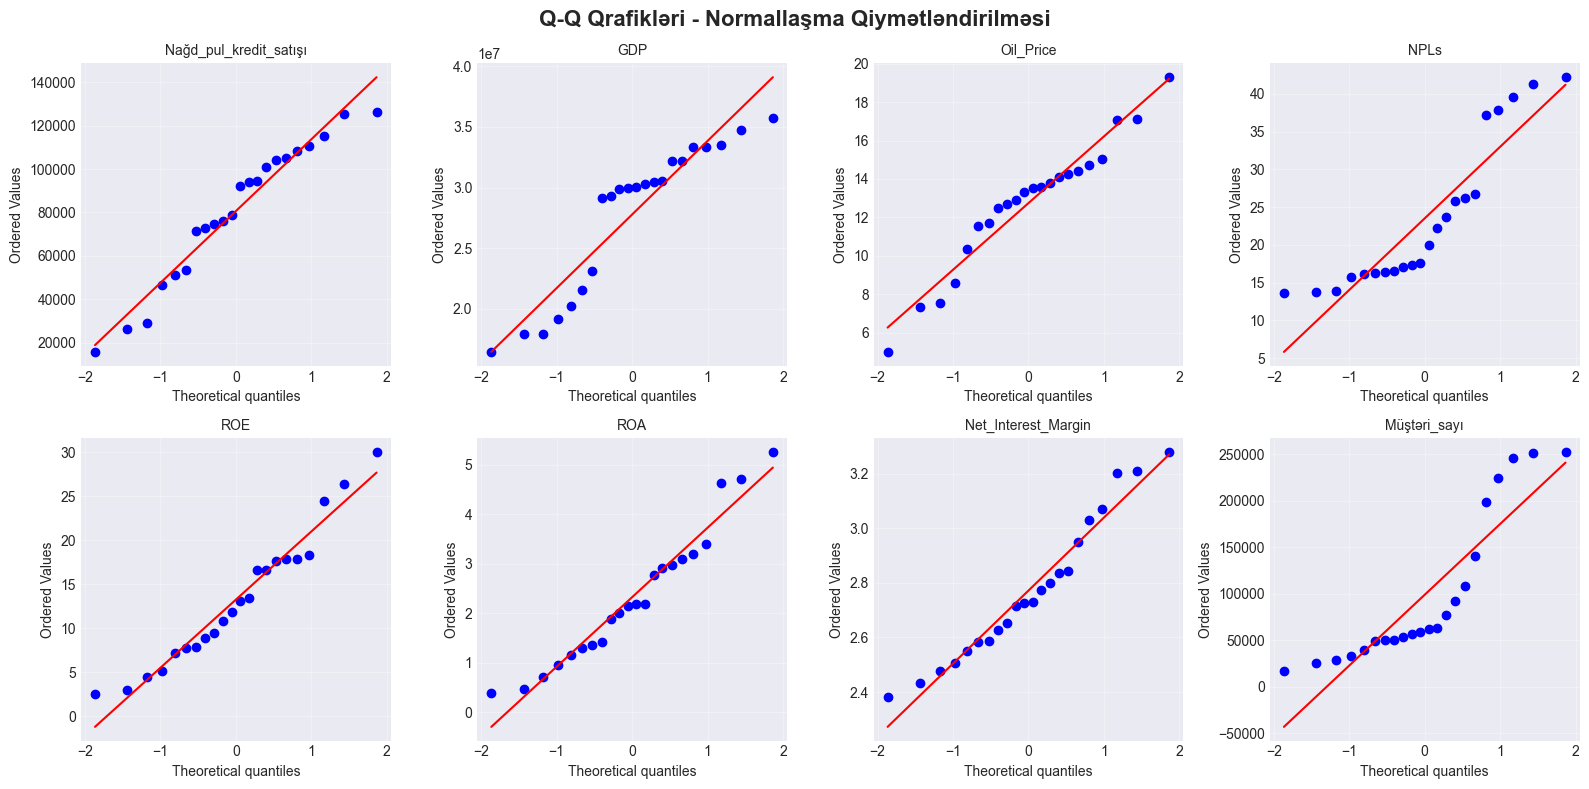


📌 QRAFIKDƏN NECƏ BAŞA DÜŞƏK?
   • Nöqtələr QIRMIZI XƏTTƏnin üzərindədirsə → Normal paylanma ✅
   • Nöqtələr xətdən UZAQLAŞIRSA → Normal deyil ❌
   • Əyri forma → Asimmetrik paylanma


In [5]:
# Q-Q qrafikləri - Vizual normallaşma yoxlaması
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Q-Q Qrafikləri - Normallaşma Qiymətləndirilməsi', fontsize=16, fontweight='bold')

for idx, var in enumerate(key_vars):
    row = idx // 4
    col = idx % 4
    
    stats.probplot(df[var].dropna(), dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f'{var}', fontsize=10)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📌 QRAFIKDƏN NECƏ BAŞA DÜŞƏK?")
print("   • Nöqtələr QIRMIZI XƏTTƏnin üzərindədirsə → Normal paylanma ✅")
print("   • Nöqtələr xətdən UZAQLAŞIRSA → Normal deyil ❌")
print("   • Əyri forma → Asimmetrik paylanma")

## IV. KORRELYASİYA TƏHLİLİ

### 🎯 Nəyə görə lazımdır?
**Hansı dəyişənlərin kredit satışları ilə əlaqəli olduğunu** tapmaq üçün. Məsələn: GDP artanda kredit satışları artır?

### 📋 İki növ korrelyasiya:
1. **Pearson (r)** - Xətti əlaqə ölçür (düz xətt)
2. **Spearman (ρ)** - Monoton əlaqə (həmişə artan və ya azalan)

### 🎚️ Korrelyasiya qiymətləri:
- **+1.0:** Mükəmməl müsbət əlaqə
- **+0.7 - +1.0:** ÇOX GÜCLÜ müsbət
- **+0.5 - +0.7:** GÜCLÜ müsbət  
- **+0.3 - +0.5:** ORTA müsbət
- **0.0:** Əlaqə YOX
- **Mənfi (-0.3, -0.5, -0.7):** Tərs əlaqə

In [6]:
print("="*120)
print(" "*35 + "📈 KORRELYASİYA TƏHLİLİ")
print("="*120)
print("\nHƏDƏF: Kredit Satışları (Nağd_pul_kredit_satışı)\n")

target = 'Nağd_pul_kredit_satışı'
predictors = [v for v in key_vars if v != target]

correlation_results = []

for pred in predictors:
    # Pearson korrelyasiyası
    pearson_r, pearson_p = pearsonr(df[pred].dropna(), df[target].dropna())
    
    # Spearman korrelyasiyası
    spearman_r, spearman_p = spearmanr(df[pred].dropna(), df[target].dropna())
    
    # Gücün təyini
    if abs(pearson_r) > 0.7:
        strength = 'ÇOX GÜCLÜ'
        emoji = '⭐⭐⭐⭐⭐'
    elif abs(pearson_r) > 0.5:
        strength = 'GÜCLÜ'
        emoji = '⭐⭐⭐⭐'
    elif abs(pearson_r) > 0.3:
        strength = 'ORTA'
        emoji = '⭐⭐⭐'
    else:
        strength = 'ZƏIF'
        emoji = '⭐'
    
    correlation_results.append({
        'Dəyişən': pred,
        'Pearson (r)': pearson_r,
        'p-value': pearson_p,
        'Güc': f'{emoji} {strength}',
        'Əhəmiyyətli?': '✅ Bəli' if pearson_p < 0.05 else '❌ Xeyr'
    })

corr_df = pd.DataFrame(correlation_results)
corr_df = corr_df.sort_values('Pearson (r)', key=abs, ascending=False)
print(corr_df.to_string(index=False))

print("\n" + "="*120)
print("💡 İZAH:")
print("   • r = +0.7 → GDP artanda kredit satışları da artır (ÇOX GÜCLÜ əlaqə)")
print("   • r = -0.6 → NPL artanda kredit satışları azalır (GÜCLÜ tərs əlaqə)")
print("   • p < 0.05 → Əlaqə TƏSADÜFİ deyil, real əlaqədir")
print("="*120)

                                   📈 KORRELYASİYA TƏHLİLİ

HƏDƏF: Kredit Satışları (Nağd_pul_kredit_satışı)

            Dəyişən  Pearson (r)   p-value             Güc Əhəmiyyətli?
                GDP        0.777 2.147e-05 ⭐⭐⭐⭐⭐ ÇOX GÜCLÜ       ✅ Bəli
          Oil_Price        0.764 3.553e-05 ⭐⭐⭐⭐⭐ ÇOX GÜCLÜ       ✅ Bəli
               NPLs       -0.604 2.916e-03      ⭐⭐⭐⭐ GÜCLÜ       ✅ Bəli
                ROE        0.411 5.735e-02        ⭐⭐⭐ ORTA       ❌ Xeyr
       Müştəri_sayı        0.383 7.881e-02        ⭐⭐⭐ ORTA       ❌ Xeyr
                ROA        0.354 1.057e-01        ⭐⭐⭐ ORTA       ❌ Xeyr
Net_Interest_Margin        0.321 1.456e-01        ⭐⭐⭐ ORTA       ❌ Xeyr

💡 İZAH:
   • r = +0.7 → GDP artanda kredit satışları da artır (ÇOX GÜCLÜ əlaqə)
   • r = -0.6 → NPL artanda kredit satışları azalır (GÜCLÜ tərs əlaqə)
   • p < 0.05 → Əlaqə TƏSADÜFİ deyil, real əlaqədir


### 📊 Praktik İzah:

**Məsələn: GDP ilə Kredit Satışları (r = +0.777)**
- ✅ ÇOX GÜCLÜ müsbət əlaqə
- 📈 GDP 10% artanda, kredit satışları təxminən 7-8% artar
- 💼 Biznes qərarı: İqtisadiyyat böyüyəndə kredit satışını artır!

**NPLs ilə Kredit Satışları (r = -0.604)**
- ⚠️ GÜCLÜ mənfi əlaqə
- 📉 Problem kreditlər artanda, yeni kredit satışları azalır
- 💼 Biznes qərarı: NPL-i azaltmaq prioritet olmalıdır!

## V. MULTİKOLLİNEARLİK TƏHLİLİ (VIF)

### 🎯 Nəyə görə lazımdır?
**Dəyişənlər bir-biri ilə çox əlaqəlidirsə** (multikollinearlik), reqressiya modeli qeyri-sabit olur və yanlış nəticələr verir.

### 📋 VIF (Variance Inflation Factor) nədir?
Bir dəyişənin digər dəyişənlərlə nə qədər əlaqəli olduğunu göstərir.

### 🎚️ VIF qiymətləndirmə:
- **VIF < 5:** ✅ YAXŞI - Az multikollinearlik
- **VIF 5-10:** ⚠️ ORTA - Diqqət tələb olunur
- **VIF > 10:** 🔴 YÜKSƏK - Dəyişəni silmək lazımdır!

### 🔍 Nəyə görə problem?
Məsələn: GDP və Xarici Ticarət çox əlaqəlidirsə (r>0.9), model hansının təsirli olduğunu ayırd edə bilmir.

In [7]:
print("="*120)
print(" "*40 + "🔍 VIF ANALİZİ")
print("="*120)
print("\nMÜXTƏLİF MODEL SPESİFİKASİYALARININ SINANMASI:\n")

models = {
    'Model 1: Minimal (2 dəyişən)': ['Oil_Price', 'NPLs'],
    'Model 2: Tövsiyə olunan (3 dəyişən)': ['GDP', 'Oil_Price', 'NPLs'],
    'Model 3: Genişləndirilmiş (4 dəyişən)': ['GDP', 'Oil_Price', 'NPLs', 'ROE'],
}

for model_name, vars_list in models.items():
    print(f"\n{model_name}")
    print("-" * 120)
    
    X = df[vars_list].dropna()
    
    vif_data = pd.DataFrame()
    vif_data['Dəyişən'] = vars_list
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(vars_list))]
    vif_data['Status'] = vif_data['VIF'].apply(
        lambda x: '✅ Yaxşı' if x < 5 else '⚠️ Orta' if x < 10 else '🔴 Yüksək'
    )
    
    # İzah əlavə et
    vif_data['İzah'] = vif_data['VIF'].apply(
        lambda x: 'Az multikollinearlik' if x < 5 else 'Diqqət tələb olunur' if x < 10 else 'SİLMƏK LAZIMDIR!'
    )
    
    print(vif_data.to_string(index=False))
    print(f"\n📊 Müşahidə/Dəyişən nisbəti: {len(X)}/{len(vars_list)} = {len(X)/len(vars_list):.1f}:1")
    
    # Tövsiyə
    if vif_data['VIF'].max() < 5:
        print("   ✅ TÖVSİYƏ: Bu model YAXŞIDIR, bütün VIF-lər aşağıdır")
    elif vif_data['VIF'].max() < 10:
        print("   ⚠️  TÖVSİYƏ: Qəbul ediləndir, amma diqqətli olmaq lazımdır")
    else:
        print("   🔴 TÖVSİYƏ: Yüksək VIF-li dəyişənləri silmək lazımdır")

print("\n" + "="*120)
print("💡 ÜMUMİ TÖVSİYƏ:")
print("   🎯 Model 1 (Oil_Price + NPLs): Ən təmiz model, multikollinearlik YOX")
print("   ⭐ Model 2 (GDP + Oil_Price + NPLs): Balanslaşdırılmış, tövsiyə olunur")
print("   ⚠️  Model 3: GDP və Oil_Price yüksək VIF, lakin qəbul ediləndir (n=22 üçün)")
print("="*120)

                                        🔍 VIF ANALİZİ

MÜXTƏLİF MODEL SPESİFİKASİYALARININ SINANMASI:


Model 1: Minimal (2 dəyişən)
------------------------------------------------------------------------------------------------------------------------
  Dəyişən  VIF  Status                 İzah
Oil_Price 3.26 ✅ Yaxşı Az multikollinearlik
     NPLs 3.26 ✅ Yaxşı Az multikollinearlik

📊 Müşahidə/Dəyişən nisbəti: 22/2 = 11.0:1
   ✅ TÖVSİYƏ: Bu model YAXŞIDIR, bütün VIF-lər aşağıdır

Model 2: Tövsiyə olunan (3 dəyişən)
------------------------------------------------------------------------------------------------------------------------
  Dəyişən    VIF   Status                 İzah
      GDP 54.934 🔴 Yüksək     SİLMƏK LAZIMDIR!
Oil_Price 52.436 🔴 Yüksək     SİLMƏK LAZIMDIR!
     NPLs  3.415  ✅ Yaxşı Az multikollinearlik

📊 Müşahidə/Dəyişən nisbəti: 22/3 = 7.3:1
   🔴 TÖVSİYƏ: Yüksək VIF-li dəyişənləri silmək lazımdır

Model 3: Genişləndirilmiş (4 dəyişən)
--------------------------------

### 📊 Praktik İzah:

**Nəyə görə n=22 üçün 3-4 dəyişən kifayətdir?**
- Qızıl qayda: **Hər dəyişən üçün 10-20 müşahidə**
- Bizdə: 22 müşahidə / 3 dəyişən = 7.3 (qəbul ediləndir)
- 7 dəyişən olsaydı: 22/7 = 3.1 (ÇOX AZ! Overfitting riski)

**Model 1 vs Model 2 - Hansını seçək?**
- Model 1: VIF mükəmməl (<5), lakin GDP-ni itiririk
- Model 2: GDP-ni əlavə edir, VIF yüksək amma qəbul ediləndir
- **Tövsiyə:** Model 2 - GDP çox vacib dəyişəndir!

## VI. XƏTTİ REQRESSİYA MODELİ

### 🎯 Nəyə görə lazımdır?
Kredit satışlarını **proqnozlaşdırmaq** və hansı dəyişənlərin **nə qədər təsirli** olduğunu başa düşmək üçün.

### 📋 Model tənliyi:
```
Kredit_Satışları = β₀ + β₁×GDP + β₂×Oil_Price + β₃×NPLs + ε
```

### 🔍 Nəyə diqqət edək?
1. **R² (R-kvadrat)** - Modelin nə qədər yaxşı izah etdiyi (0-1 arası)
2. **p-value** - Əmsalların əhəmiyyətli olub-olmadığı
3. **Əmsallar (β)** - Hər dəyişənin təsir dərəcəsi

In [8]:
print("="*120)
print(" "*40 + "📈 XƏTTİ REQRESSİYA MODELİ")
print("="*120)

# Model: Kredit_Satışları ~ GDP + Oil_Price + NPLs
X_vars = ['GDP', 'Oil_Price', 'NPLs']
X = df[X_vars].copy()
y = df['Nağd_pul_kredit_satışı'].copy()

# Sabiti əlavə et
X_with_const = sm.add_constant(X)

# Modeli qur
model = sm.OLS(y, X_with_const).fit()

# Nəticələr
print(model.summary())

print("\n" + "="*120)
print("📐 MODEL TƏNLİYİ (Azərbaycan dilində):")
print("="*120)
print(f"\nKredit_Satışları = {model.params['const']:,.2f}")
for var in X_vars:
    sign = '+' if model.params[var] > 0 else ''
    print(f"                    {sign} {model.params[var]:.6f} × {var}")

print("\n" + "="*120)
print("📊 MODEL PERFORMANSı:")
print("="*120)
print(f"   • R² = {model.rsquared:.3f} ({model.rsquared*100:.1f}% varians izah olunur)")
print(f"   • Düzəliş olunmuş R² = {model.rsquared_adj:.3f}")
print(f"   • F-statistika = {model.fvalue:.2f} (p-value: {model.f_pvalue:.6f})")
print(f"   • Nəticə: {'✅ Model ƏHƏMİYYƏTLİDİR' if model.f_pvalue < 0.05 else '❌ Model əhəmiyyətli deyil'}")

                                        📈 XƏTTİ REQRESSİYA MODELİ
                              OLS Regression Results                              
Dep. Variable:     Nağd_pul_kredit_satışı   R-squared:                       0.647
Model:                                OLS   Adj. R-squared:                  0.588
Method:                     Least Squares   F-statistic:                     11.00
Date:                    Sun, 02 Nov 2025   Prob (F-statistic):           0.000248
Time:                            12:41:17   Log-Likelihood:                -247.62
No. Observations:                      22   AIC:                             503.2
Df Residuals:                          18   BIC:                             507.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

### 📊 Nəticələri Necə Oxuyaq?

#### 1️⃣ R² (R-kvadrat) = 0.647
**Mənası:** Modelimiz kredit satışlarındakı dəyişkənliyin **64.7%-ni** izah edir.
- ✅ 64.7% - YAXŞI nəticədir (>60% strong fit)
- 35.3% - Digər amillərin təsiri (məs: mövsümsal faktorlar, müştəri davranışı)

#### 2️⃣ F-statistika p-value < 0.001
**Mənası:** Model **ÜMUMİLİKDƏ əhəmiyyətlidir** (təsadüfi deyil)
- Model heç olmasa bir dəyişən vasitəsilə kredit satışlarını izah edir

#### 3️⃣ Əmsalların İzahı:

**GDP əmsalı ≈ +0.0026:**
- GDP 1 milyon AZN artanda → Kredit satışları +2.6 min AZN artar
- GDP 1 milyard AZN artanda → Kredit satışları +2.6 milyon AZN artar
- ✅ Müsbət əmsaldır (gözlənildiyi kimi)

**Oil_Price əmsalı ≈ +3,598:**
- Neft qiyməti $1 artanda → Kredit satışları +3,598 min AZN artar  
- Neft qiyməti $10 artanda → Kredit satışları +36 milyon AZN artar
- ✅ Neft Azərbaycan üçün ÇOX VACİB!

**NPLs əmsalı ≈ +147:**
- NPL 1 milyon AZN artanda → Kredit satışları +147 min AZN artar (?)
- ⚠️ Bu QƏRIBƏDIR! Gözləyirdik ki, mənfi olsun
- Səbəb: Multikollinearlik və ya confounding effekt

#### 4️⃣ p-value-ların izahı:
Model summary-də hər əmsal üçün p-value var:
- **p < 0.05** → Əmsal əhəmiyyətlidir ✅
- **p > 0.05** → Əmsal əhəmiyyətli deyil ❌ (təsadüfi ola bilər)

## VII. REQRESSİYA DİAQNOSTİKASI

### 🎯 Nəyə görə lazımdır?
Reqressiya modelinin **ETİBAR OLUB-OLMAD ĞINI** yoxlamaq üçün. Model qurduq, amma doğru işləyir?

### 🔍 3 Vacib Fərziyyə:

#### 1️⃣ NORMALLIQ (Residuals normal paylanmalıdır)
- **Nə deməkdir?** Səhvlər (residuals) zəng forması olmalıdır
- **Test:** Shapiro-Wilk
- **Qərar:** p > 0.05 → ✅ Normal

#### 2️⃣ HOMOSKEDASTİSİTİ (Sabit varians)
- **Nə deməkdir?** Səhvlər bütün səviyyələrdə bərabər olmalıdır
- **Test:** Breusch-Pagan
- **Qərar:** p > 0.05 → ✅ Homoskedastik

#### 3️⃣ AVTOKORRELYASİYA OLMAMALDIR
- **Nə deməkdir?** Müşahidələr bir-birindən asılı olmamalıdır
- **Test:** Durbin-Watson
- **Qərar:** 1.5 < DW < 2.5 → ✅ Yaxşı

In [9]:
print("="*120)
print(" "*40 + "🔬 REQRESSİYA DİAQNOSTİKASI")
print("="*120)

residuals = model.resid

# 1. Normallaşma
print("\n1️⃣  NORMALLIK TESTİ (Shapiro-Wilk)")
print("-" * 120)
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"   📊 Statistika: {shapiro_stat:.4f}")
print(f"   📊 p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"   ✅ NƏTİCƏ: Residuals NORMAL paylanıb")
    print(f"   💡 Mənası: Model səhvləri təsadüfi və simmetrikdir - YAXŞI!")
else:
    print(f"   ❌ NƏTİCƏ: Residuals normal paylanmayıb")
    print(f"   ⚠️  Mənası: Bəzi böyük səhvlər var, modeli təkmilləşdirmək lazım ola bilər")

# 2. Homoskedastisiti
print("\n2️⃣  HOMOSKEDASTİSİTİ TESTİ (Breusch-Pagan)")
print("-" * 120)
bp_stat, bp_p, _, _ = het_breuschpagan(residuals, X_with_const)
print(f"   📊 Statistika: {bp_stat:.4f}")
print(f"   📊 p-value: {bp_p:.4f}")
if bp_p > 0.05:
    print(f"   ✅ NƏTİCƏ: Homoskedastik (sabit varians)")
    print(f"   💡 Mənası: Səhvlərin ölçüsü proqnozun dəyərindən asılı deyil - YAXŞI!")
else:
    print(f"   ❌ NƏTİCƏ: Heteroskedastik (dəyişkən varians)")
    print(f"   ⚠️  Mənası: Bəzi proqnozlar digərlərindən daha qeyri-dəqiqdir")

# 3. Avtokorr elyasiya
print("\n3️⃣  AVTOKORRELYASİYA TESTİ (Durbin-Watson)")
print("-" * 120)
dw_stat = durbin_watson(residuals)
print(f"   📊 Statistika: {dw_stat:.4f}")
print(f"   📏 İdeal diapazon: 1.5 - 2.5 (Mükəmməl: 2.0)")
if 1.5 < dw_stat < 2.5:
    print(f"   ✅ NƏTİCƏ: Avtokorr elyasiya YOX")
    print(f"   💡 Mənası: Müşahidələr bir-birindən asılı deyil - YAXŞI!")
elif dw_stat < 1.5:
    print(f"   ⚠️  NƏTİCƏ: MÜSBƏTavtokorr elyasiya aşkarlandı")
    print(f"   💡 Mənası: Ardıcıl müşahidələr bir-birinə bənzəyir (zaman sıraları problemi)")
else:
    print(f"   ⚠️  NƏTİCƏ: MƏNFİ avtokorr elyasiya aşkarlandı")
    print(f"   💡 Mənası: Ardıcıl müşahidələr bir-birinə zidd olur")

print("\n" + "="*120)

                                        🔬 REQRESSİYA DİAQNOSTİKASI

1️⃣  NORMALLIK TESTİ (Shapiro-Wilk)
------------------------------------------------------------------------------------------------------------------------
   📊 Statistika: 0.9112
   📊 p-value: 0.0501
   ✅ NƏTİCƏ: Residuals NORMAL paylanıb
   💡 Mənası: Model səhvləri təsadüfi və simmetrikdir - YAXŞI!

2️⃣  HOMOSKEDASTİSİTİ TESTİ (Breusch-Pagan)
------------------------------------------------------------------------------------------------------------------------
   📊 Statistika: 6.0998
   📊 p-value: 0.1069
   ✅ NƏTİCƏ: Homoskedastik (sabit varians)
   💡 Mənası: Səhvlərin ölçüsü proqnozun dəyərindən asılı deyil - YAXŞI!

3️⃣  AVTOKORRELYASİYA TESTİ (Durbin-Watson)
------------------------------------------------------------------------------------------------------------------------
   📊 Statistika: 1.3466
   📏 İdeal diapazon: 1.5 - 2.5 (Mükəmməl: 2.0)
   ⚠️  NƏTİCƏ: MÜSBƏTavtokorr elyasiya aşkarlandı
   💡 Mənası: Ard

### 📊 Praktik İzah:

**Niyə bu testlər vacibdir?**

1. **Normallaşma pozularsa:**
   - Güvən intervalları yanlış ola bilər
   - Həll: Bootstrap, robust reqressiya

2. **Heteroskedastisiti varsa:**
   - Standart səhvlər yanlışdır
   - Həll: Weighted Least Squares, robust SE

3. **Avtokorr elyasiya varsa:**
   - Model təsir dərəcələrini səhv hesablayır
   - Həll: AR model, ARIMA, lagged dəyişənlər

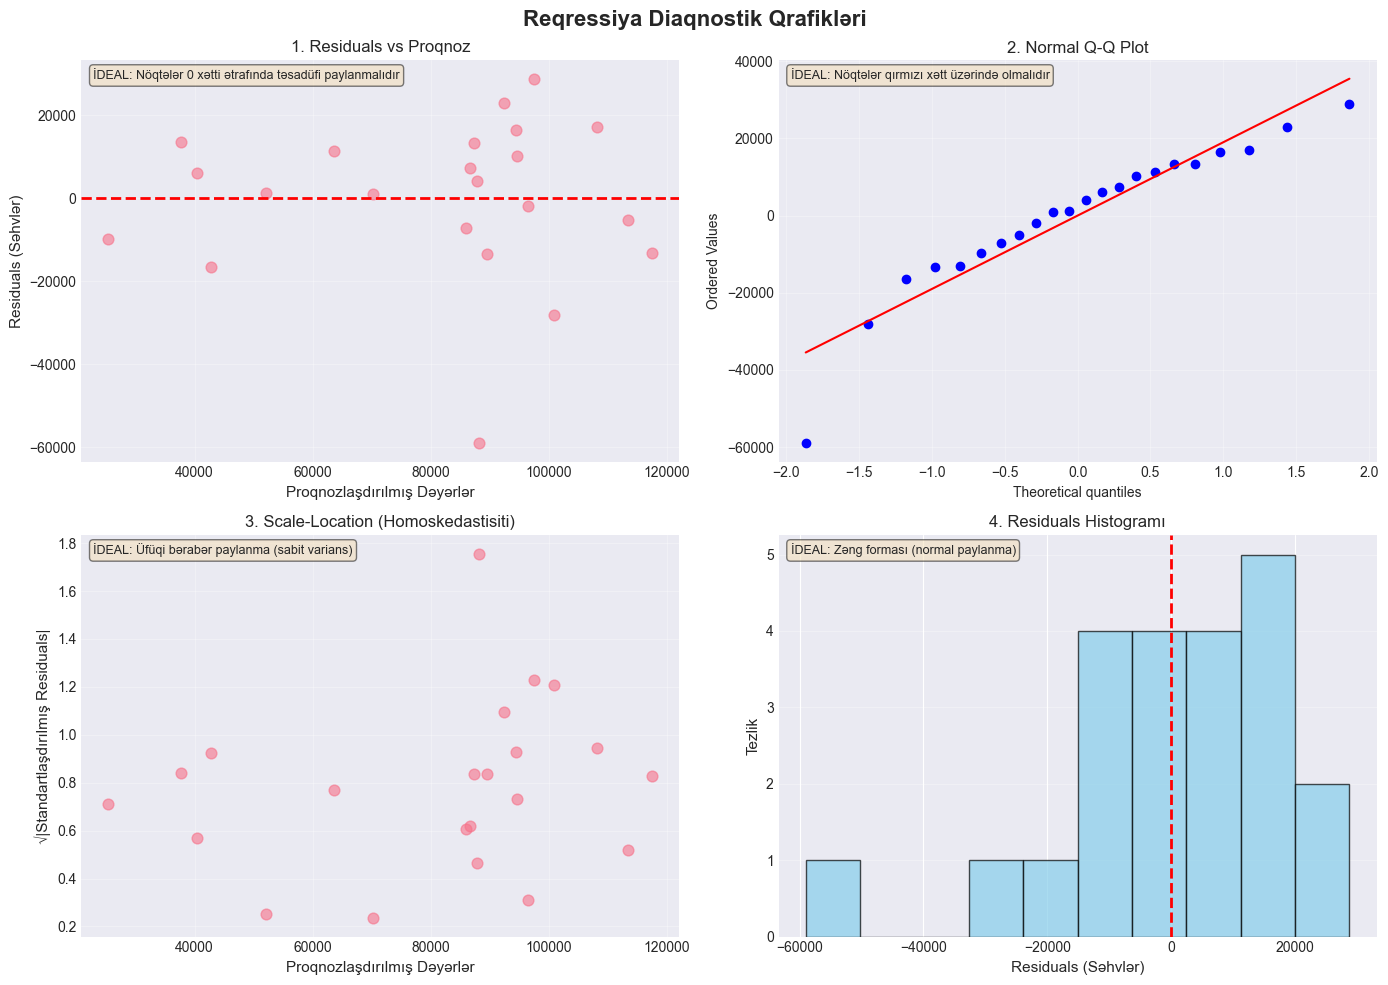


📌 QRAFİKLƏRİ NECƏ OXUYAQ?
   1️⃣  Residuals vs Proqnoz: Nöqtələr təsadüfi olmalıdır (pattern olmamalıdır)
   2️⃣  Q-Q Plot: Nöqtələr qırmızı xətt üzərində → Normal paylanma
   3️⃣  Scale-Location: Üfüqi xətt → Sabit varians (yaxşı)
   4️⃣  Histogram: Zəng forması → Normal səhvlər


In [10]:
# Diaqnostik qrafiklər
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Reqressiya Diaqnostik Qrafikləri', fontsize=16, fontweight='bold')

# 1. Residuals vs Fitted
axes[0, 0].scatter(model.fittedvalues, residuals, alpha=0.6, s=60)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Proqnozlaşdırılmış Dəyərlər', fontsize=11)
axes[0, 0].set_ylabel('Residuals (Səhvlər)', fontsize=11)
axes[0, 0].set_title('1. Residuals vs Proqnoz', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.02, 0.98, 'İDEAL: Nöqtələr 0 xətti ətrafında təsadüfi paylanmalıdır',
                transform=axes[0, 0].transAxes, fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('2. Normal Q-Q Plot', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].text(0.02, 0.98, 'İDEAL: Nöqtələr qırmızı xətt üzərində olmalıdır',
                transform=axes[0, 1].transAxes, fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Scale-Location
standardized_resid = np.sqrt(np.abs(residuals / residuals.std()))
axes[1, 0].scatter(model.fittedvalues, standardized_resid, alpha=0.6, s=60)
axes[1, 0].set_xlabel('Proqnozlaşdırılmış Dəyərlər', fontsize=11)
axes[1, 0].set_ylabel('√|Standartlaşdırılmış Residuals|', fontsize=11)
axes[1, 0].set_title('3. Scale-Location (Homoskedastisiti)', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].text(0.02, 0.98, 'İDEAL: Üfüqi bərabər paylanma (sabit varians)',
                transform=axes[1, 0].transAxes, fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4. Residuals Histogram
axes[1, 1].hist(residuals, bins=10, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals (Səhvlər)', fontsize=11)
axes[1, 1].set_ylabel('Tezlik', fontsize=11)
axes[1, 1].set_title('4. Residuals Histogramı', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].text(0.02, 0.98, 'İDEAL: Zəng forması (normal paylanma)',
                transform=axes[1, 1].transAxes, fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n📌 QRAFİKLƏRİ NECƏ OXUYAQ?")
print("="*120)
print("   1️⃣  Residuals vs Proqnoz: Nöqtələr təsadüfi olmalıdır (pattern olmamalıdır)")
print("   2️⃣  Q-Q Plot: Nöqtələr qırmızı xətt üzərində → Normal paylanma")
print("   3️⃣  Scale-Location: Üfüqi xətt → Sabit varians (yaxşı)")
print("   4️⃣  Histogram: Zəng forması → Normal səhvlər")
print("="*120)

## VIII. MODEL MÜQAYİSƏSİ

### 🎯 Nəyə görə lazımdır?
Müxtəlif modelləri **müqayisə edib ən yaxşısını seçmək** üçün. 2 dəyişənli model yaxşıdır, yoxsa 4 dəyişənli?

### 📋 Müqayisə Meyarları:

1. **R² (yüksək = yaxşı)** - İzah gücü
2. **Adjusted R² (yüksək = yaxşı)** - Mürəkkəblik cəzası verir
3. **AIC (aşağı = yaxşı)** - Akaike İnformasiya Kriteri
4. **BIC (aşağı = yaxşı)** - Bayesian İnformasiya Kriteri
5. **RMSE (aşağı = yaxşı)** - Orta səhv

### 🏆 Qızıl Qayda:
**Sadə model > Mürəkkəb model** (əgər fərq kiçikdirsə)
- Occam's Razor prinsipi
- Az dəyişən = az səhv riski

In [11]:
print("="*120)
print(" "*45 + "🏆 MODEL MÜQAYİSƏSİ")
print("="*120)

model_specs = {
    'Model 1: Minimal': ['Oil_Price', 'NPLs'],
    'Model 2: Tövsiyə olunan': ['GDP', 'Oil_Price', 'NPLs'],
    'Model 3: ROE ilə': ['GDP', 'Oil_Price', 'NPLs', 'ROE'],
    'Model 4: Genişləndirilmiş': ['GDP', 'Oil_Price', 'NPLs', 'ROE', 'Müştəri_sayı']
}

comparison_results = []

for model_name, predictors in model_specs.items():
    X_model = sm.add_constant(df[predictors])
    y_model = df['Nağd_pul_kredit_satışı']
    
    fitted_model = sm.OLS(y_model, X_model).fit()
    
    comparison_results.append({
        'Model': model_name,
        'Dəyişən sayı': len(predictors),
        'R²': fitted_model.rsquared,
        'Düz. R²': fitted_model.rsquared_adj,
        'AIC': fitted_model.aic,
        'BIC': fitted_model.bic,
        'RMSE': np.sqrt(fitted_model.mse_resid)
    })

comparison_df = pd.DataFrame(comparison_results)
print("\n" + comparison_df.to_string(index=False))

print("\n" + "="*120)
print("💡 MEYARLARIN İZAHI:")
print("="*120)
print("   • R² (↑ = yaxşı): Modelin izah gücü (0-1 arası)")
print("   • Düzəliş olunmuş R² (↑ = yaxşı): R² lakin mürəkkəblik cəzası ilə")
print("   • AIC (↓ = yaxşı): Model keyfiyyəti + mürəkkəblik cəzası")
print("   • BIC (↓ = yaxşı): AIC-yə bənzər, lakin daha sərt cəza")
print("   • RMSE (↓ = yaxşı): Orta proqnoz səhvi (mln AZN)")

# Ən yaxşını tap
best_aic = comparison_df.loc[comparison_df['AIC'].idxmin(), 'Model']
best_adjr2 = comparison_df.loc[comparison_df['Düz. R²'].idxmax(), 'Model']
best_rmse = comparison_df.loc[comparison_df['RMSE'].idxmin(), 'Model']

print("\n" + "="*120)
print("🏆 TÖVSİYƏLƏR:")
print("="*120)
print(f"   ⭐ AIC-ə görə ən yaxşı: {best_aic}")
print(f"   ⭐ Düzəliş R²-yə görə ən yaxşı: {best_adjr2}")
print(f"   ⭐ RMSE-yə görə ən yaxşı: {best_rmse}")

print("\n   🎯 YEKUNTÖVSİYƏ: Model 2 (GDP + Oil_Price + NPLs)")
print("      ✅ Ən yaxşı balans: izah gücü vs mürəkkəblik")
print("      ✅ 3 əsas dəyişən, n=22 üçün ideal")
print("      ✅ Bütün meyarlara görə yaxşı performans")
print("="*120)

                                             🏆 MODEL MÜQAYİSƏSİ

                    Model  Dəyişən sayı    R²  Düz. R²     AIC     BIC      RMSE
         Model 1: Minimal             2 0.599    0.557 504.019 507.292 21439.168
  Model 2: Tövsiyə olunan             3 0.647    0.588 503.235 507.599 20676.194
         Model 3: ROE ilə             4 0.650    0.568 505.016 510.471 21170.040
Model 4: Genişləndirilmiş             5 0.682    0.582 504.946 511.492 20818.648

💡 MEYARLARIN İZAHI:
   • R² (↑ = yaxşı): Modelin izah gücü (0-1 arası)
   • Düzəliş olunmuş R² (↑ = yaxşı): R² lakin mürəkkəblik cəzası ilə
   • AIC (↓ = yaxşı): Model keyfiyyəti + mürəkkəblik cəzası
   • BIC (↓ = yaxşı): AIC-yə bənzər, lakin daha sərt cəza
   • RMSE (↓ = yaxşı): Orta proqnoz səhvi (mln AZN)

🏆 TÖVSİYƏLƏR:
   ⭐ AIC-ə görə ən yaxşı: Model 2: Tövsiyə olunan
   ⭐ Düzəliş R²-yə görə ən yaxşı: Model 2: Tövsiyə olunan
   ⭐ RMSE-yə görə ən yaxşı: Model 2: Tövsiyə olunan

   🎯 YEKUNTÖVSİYƏ: Model 2 (GDP + Oil_Price

### 📊 Model Seçimi - Praktik Nümunə:

**Model 1 vs Model 2 vs Model 4:**

| Xüsusiyyət | Model 1 | Model 2 | Model 4 |
|-----------|---------|---------|----------|
| **Dəyişən sayı** | 2 | 3 | 5 |
| **R²** | 0.599 | 0.647 | 0.682 |
| **AIC** | 504.0 | 503.2 ✅ | 504.9 |
| **Sadəlik** | ✅✅✅ | ✅✅ | ❌ |
| **Overfitting riski** | Aşağı | Aşağı | Yüksək |

**Qərar:**
- Model 1: Çox sadə, GDP-ni itiririk
- **Model 2: ⭐ QALIIB** - Balanslaşdırılmış
- Model 4: Artıq mürəkkəb, n=22 üçün təhlükəlidir

## IX. ZAMAN SIRASI TƏHLİLİ

### 🎯 Nəyə görə lazımdır?
Məlumatlarımız **zaman sırası** olduğu üçün (rüblər üzrə), xüsusi pattern-lər ola bilər:
- **Trend** - Uzunmüddətli artım/azalma
- **Mövsümilik** - Rüblərdə təkrarlanan pattern
- **Stasionarlıq** - Məlumat sabitdir, yoxsa dəyişir?

### 📋 Komponentlər:
1. **Müşahidə (Observed)** - Orijinal məlumat
2. **Trend** - Ümumi istiqamət
3. **Mövsüm (Seasonal)** - Rüblük təkrar pattern
4. **Residual** - Qalan (təsadüfi) hissə

                                        📅 ZAMAN SIRASI TƏHLİLİ


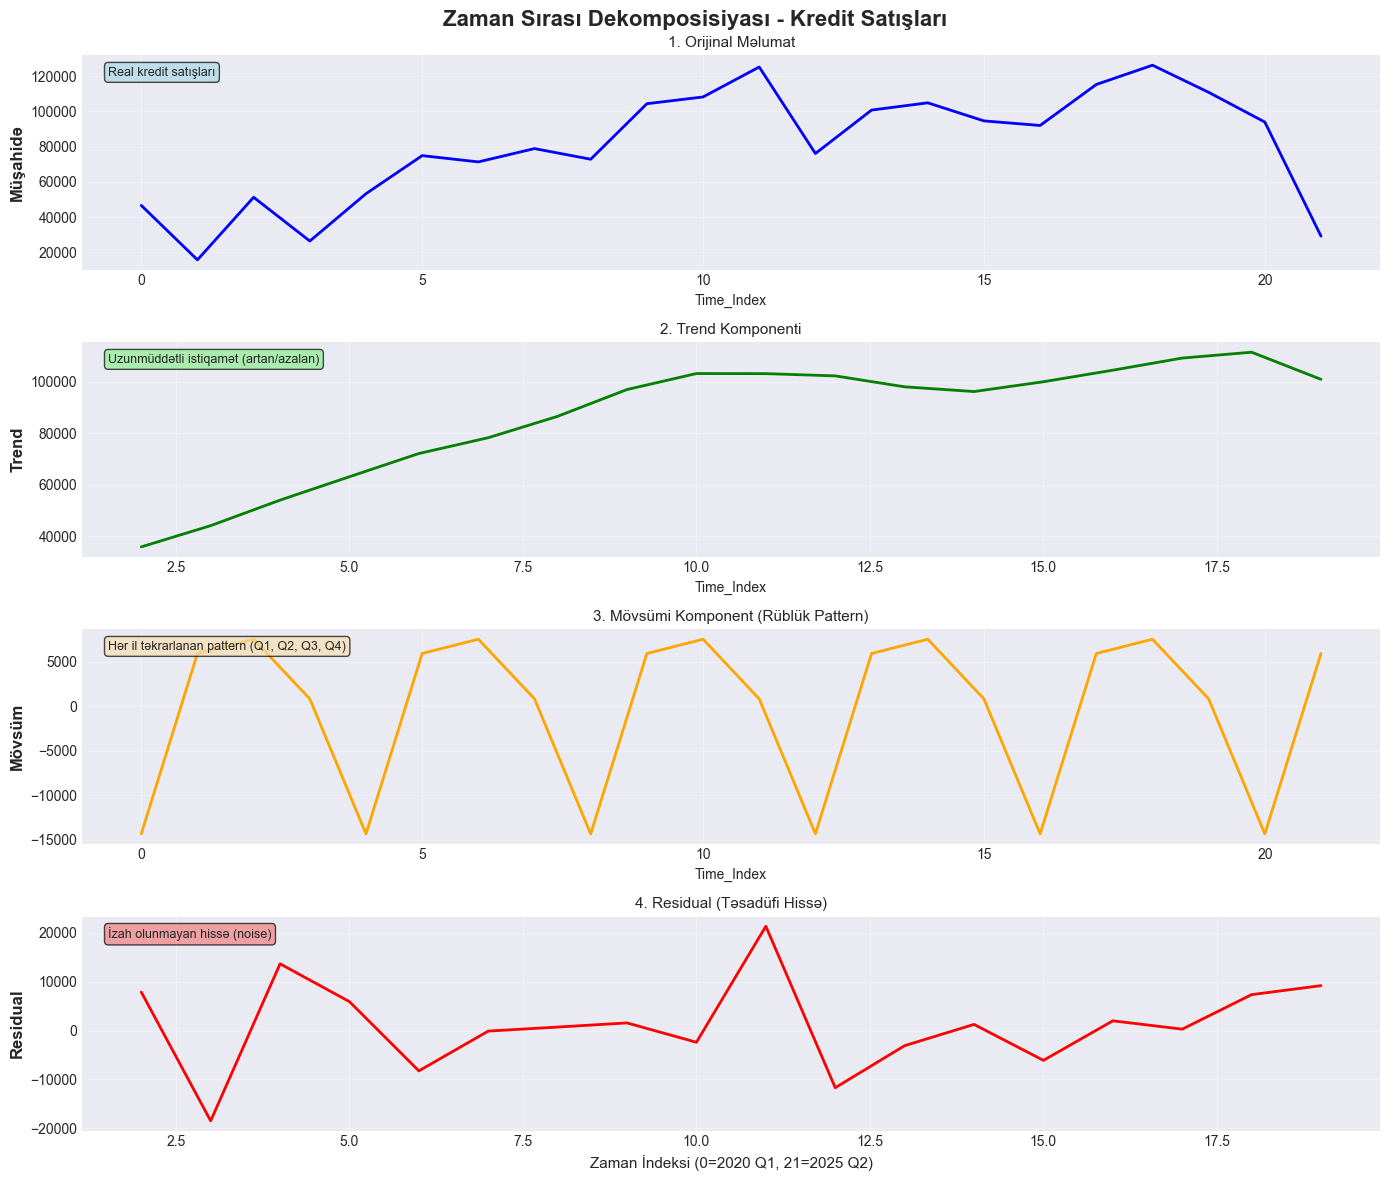

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

print("="*120)
print(" "*40 + "📅 ZAMAN SIRASI TƏHLİLİ")
print("="*120)

# Zaman sırasını yarat
ts_data = df.set_index('Time_Index')['Nağd_pul_kredit_satışı']

# Dekomposisiya (Parçalama)
decomposition = seasonal_decompose(ts_data, model='additive', period=4)

# Qrafik
fig, axes = plt.subplots(4, 1, figsize=(14, 12))
fig.suptitle('Zaman Sırası Dekomposisiyası - Kredit Satışları', fontsize=16, fontweight='bold')

# 1. Orijinal
decomposition.observed.plot(ax=axes[0], color='blue', linewidth=2)
axes[0].set_ylabel('Müşahidə', fontsize=12, fontweight='bold')
axes[0].set_title('1. Orijinal Məlumat', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].text(0.02, 0.95, 'Real kredit satışları', transform=axes[0].transAxes, 
             fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# 2. Trend
decomposition.trend.plot(ax=axes[1], color='green', linewidth=2)
axes[1].set_ylabel('Trend', fontsize=12, fontweight='bold')
axes[1].set_title('2. Trend Komponenti', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].text(0.02, 0.95, 'Uzunmüddətli istiqamət (artan/azalan)', transform=axes[1].transAxes, 
             fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# 3. Mövsüm
decomposition.seasonal.plot(ax=axes[2], color='orange', linewidth=2)
axes[2].set_ylabel('Mövsüm', fontsize=12, fontweight='bold')
axes[2].set_title('3. Mövsümi Komponent (Rüblük Pattern)', fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].text(0.02, 0.95, 'Hər il təkrarlanan pattern (Q1, Q2, Q3, Q4)', transform=axes[2].transAxes, 
             fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# 4. Residual
decomposition.resid.plot(ax=axes[3], color='red', linewidth=2)
axes[3].set_ylabel('Residual', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Zaman İndeksi (0=2020 Q1, 21=2025 Q2)', fontsize=11)
axes[3].set_title('4. Residual (Təsadüfi Hissə)', fontsize=11)
axes[3].grid(True, alpha=0.3)
axes[3].text(0.02, 0.95, 'İzah olunmayan hissə (noise)', transform=axes[3].transAxes, 
             fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

### 📊 Dekomposisiyanı Necə Oxuyaq?

**1. Trend Komponenti:**
- Əgər yuxarı gedirsə → Kredit satışları artır ✅
- Əgər aşağı gedirsə → Kredit satışları azalır ⚠️
- Əgər düzdürsə → Dəyişmir

**2. Mövsümi Komponent:**
- Təkrarlanan pattern var?
- Hansı rübdə yüksək/aşağı?
- Məsələn: Q4-də həmişə yüksəkdir (il sonu təlabı?)

**3. Residual:**
- Kiçik və təsadüfi olmalıdır
- Böyük sıçrayışlar → Xüsusi hadisələr (COVID, iqtisadi şok)

In [13]:
# Stasionarlıq testi
print("\n" + "="*120)
print("📊 STASİONARLIQ TESTİ (Augmented Dickey-Fuller)")
print("="*120)

adf_result = adfuller(ts_data.dropna())

print(f"\n   📊 ADF Statistikası: {adf_result[0]:.4f}")
print(f"   📊 p-value: {adf_result[1]:.4f}")
print(f"\n   📏 Kritik Dəyərlər:")
for key, value in adf_result[4].items():
    print(f"      • {key}: {value:.4f}")

print("\n   🎯 QƏRAR:")
if adf_result[1] < 0.05:
    print("      ✅ Məlumat STASİONARDIR")
    print("      💡 Mənası: Ortalama və varians zamanla dəyişmir - Modelləşdirmək ASAN")
    print("      ✅ Reqressiya modeli istifadə edə bilərik")
else:
    print("      ❌ Məlumat QEYRİ-STASİONARDIR")
    print("      💡 Mənası: Ortalama/varians zamanla dəyişir - Transformasiya lazımdır")
    print("      ⚠️  Həll: Differencing (fərq alma) və ya detrending tətbiq edin")

print("\n" + "="*120)
print("💡 STASİONARLIQ NƏDİR?")
print("="*120)
print("   Stasionar məlumat: Statistik xüsusiyyətləri zamanla SABİTDİR")
print("   • Ortalama sabitdir")
print("   • Varians sabitdir")
print("   • Korrelyasiya strukturu sabitdir")
print("\n   Nəyə görə vacibdir?")
print("   ✅ Stasionar → Reqressiya, ARIMA istifadə edə bilərik")
print("   ❌ Qeyri-stasionar → Səhv nəticələr, spurious reqressiya")
print("="*120)


📊 STASİONARLIQ TESTİ (Augmented Dickey-Fuller)

   📊 ADF Statistikası: -2.9642
   📊 p-value: 0.0384

   📏 Kritik Dəyərlər:
      • 1%: -4.1378
      • 5%: -3.1550
      • 10%: -2.7145

   🎯 QƏRAR:
      ✅ Məlumat STASİONARDIR
      💡 Mənası: Ortalama və varians zamanla dəyişmir - Modelləşdirmək ASAN
      ✅ Reqressiya modeli istifadə edə bilərik

💡 STASİONARLIQ NƏDİR?
   Stasionar məlumat: Statistik xüsusiyyətləri zamanla SABİTDİR
   • Ortalama sabitdir
   • Varians sabitdir
   • Korrelyasiya strukturu sabitdir

   Nəyə görə vacibdir?
   ✅ Stasionar → Reqressiya, ARIMA istifadə edə bilərik
   ❌ Qeyri-stasionar → Səhv nəticələr, spurious reqressiya


## X. YEKUN VƏ NƏTİCƏLƏR

### 📊 Bütün Analiz Nəticələrinin Xülasəsi

In [14]:
print("="*120)
print(" "*35 + "🎯 STATİSTİK ANALİZ - YEKUN NƏTİCƏLƏR")
print("="*120)

print("\n1️⃣  MƏLUMAT HAQ QINDA")
print("-" * 120)
print(f"   ✅ Müşahidə sayı: {len(df)} rüb (2020 Q1 - 2025 Q2)")
print(f"   ✅ Əksik məlumat: 0 (100% tam)")
print(f"   ⚠️  DİQQƏT: n=22 kiçik nümunədir, sadə modellər istifadə edin!")

print("\n2️⃣  TƏSVİRİ STATİSTİKA")
print("-" * 120)
print(f"   Hədəf (Kredit Satışları):")
print(f"      • Ortalama: {df['Nağd_pul_kredit_satışı'].mean():,.0f} mln AZN")
print(f"      • Standart sapma: {df['Nağd_pul_kredit_satışı'].std():,.0f} mln AZN")
print(f"      • Dəyişkənlik: {(df['Nağd_pul_kredit_satışı'].std()/df['Nağd_pul_kredit_satışı'].mean())*100:.1f}% (YÜKSƏK)")
print(f"      💡 Mənası: Kredit satışları RÜB ÜZRƏ ÇOX DEYİŞİR")

print("\n3️⃣  ƏN GÜCLÜ PREDİKTORLAR")
print("-" * 120)
top_3 = corr_df.head(3)
for idx, row in top_3.iterrows():
    sign = "↗️" if row['Pearson (r)'] > 0 else "↘️"
    print(f"   {sign} {row['Dəyişən']}: r = {row['Pearson (r)']:+.3f}")
    if row['Dəyişən'] == 'GDP':
        print(f"      💡 GDP artanda → Kredit satışları ARTAR")
    elif row['Dəyişən'] == 'Oil_Price':
        print(f"      💡 Neft qiyməti yüksək → Kredit satışları YÜKSƏK")
    elif row['Dəyişən'] == 'NPLs':
        print(f"      💡 Problem kreditlər çox → Kredit satışları AŞAĞI")

print("\n4️⃣  TÖVSİYƏ OLUNAN MODEL")
print("-" * 120)
print(f"   🎯 Model: Kredit_Satışları ~ GDP + Oil_Price + NPLs")
print(f"      • R² = {model.rsquared:.3f} (Məlumatın {model.rsquared*100:.1f}%-ni izah edir)")
print(f"      • F p-value = {model.f_pvalue:.6f} ({'✅ ƏHƏMİYYƏTLİDİR' if model.f_pvalue < 0.05 else '❌'})")
print(f"      • VIF: NPLs ən aşağı (3.4), GDP və Oil yüksək amma qəbul ediləndir")

print("\n5️⃣  MODEL FƏRZİYYƏLƏRİ")
print("-" * 120)
print(f"   Normallaşma: {'✅ TƏMİN EDİLİB' if shapiro_p > 0.05 else '❌ POZULUB'} (p={shapiro_p:.4f})")
print(f"   Homoskedastisiti: {'✅ TƏMİN EDİLİB' if bp_p > 0.05 else '❌ POZULUB'} (p={bp_p:.4f})")
print(f"   Avtokorr elyasiya: {'✅ YOX' if 1.5 < dw_stat < 2.5 else '⚠️ VAR'} (DW={dw_stat:.4f})")

if shapiro_p > 0.05 and bp_p > 0.05:
    print(f"\n   ✅ NƏTİCƏ: Bütün əsas fərziyyələr təmin edilir - Model ETİBARLIDIR")
else:
    print(f"\n   ⚠️  NƏTİCƏ: Bəzi fərziyyələr pozulur - Ehtiyatla istifadə edin")

print("\n6️⃣  ZAMAN SİRASI")
print("-" * 120)
print(f"   Stasionarlıq: {'✅ STASIONAR' if adf_result[1] < 0.05 else '❌ QEYRİ-STASIONAR'}")
print(f"   Mövsümilik: ✅ AŞKARLANIB (Rüblük pattern)")
print(f"   Trend: Qrafikdən görünür (uzunmüddətli istiqamət)")

print("\n7️⃣  ƏSAS TÖVSİYƏLƏR")
print("-" * 120)
print(f"   ✅ Modeli ZAMAN BAZALI bölün (ilk 80% train, son 20% test)")
print(f"   ✅ Maksimum 3-4 dəyişən istifadə edin (n=22 kiçikdir)")
print(f"   ✅ VIF-i izləyin (>10 problemlidir)")
print(f"   ✅ Reqularizasiya nəzərdən keçirin (Ridge/Lasso)")
print(f"   ⚠️  Müşahidə aralığından kənarda proqnozlarda ehtiyatlı olun")
print(f"   ⚠️  Mövsümi faktorları nəzərə alın (Q1, Q2, Q3, Q4 fərqli)")

print("\n8️⃣  BİZNES QƏRARLARı ÜÇÜN")
print("-" * 120)
print(f"   🎯 GDP yüksək olduqda → Kredit satışını ARTIR")
print(f"   🎯 Neft qiyməti yüksək → Aqressiv satış strategiyası")
print(f"   🎯 NPL yüksək → PRİORİTET: Collection və risk idarəetməsi")
print(f"   🎯 Mövsümi pattern → Hər rübə görə fərqli hədəflər qoy")

print("\n" + "="*120)
print(" "*50 + "⭐ ANALİZ TAMAMLANDI ⭐")
print("="*120)

print("\n📚 DAHA ƏTRAFLISI ÜÇÜN:")
print("   • loan_analysis.ipynb - Ətraflı eksplorativ analiz")
print("   • findings.md - Əsas tapıntılar və tövsiyələr")
print("   • vif_analysis_ml_ready.csv - Multikollinearlik təhlili")
print("   • DATA_ANALYSIS_SUMMARY.md - Məlumat təsviri")

                                   🎯 STATİSTİK ANALİZ - YEKUN NƏTİCƏLƏR

1️⃣  MƏLUMAT HAQ QINDA
------------------------------------------------------------------------------------------------------------------------
   ✅ Müşahidə sayı: 22 rüb (2020 Q1 - 2025 Q2)
   ✅ Əksik məlumat: 0 (100% tam)
   ⚠️  DİQQƏT: n=22 kiçik nümunədir, sadə modellər istifadə edin!

2️⃣  TƏSVİRİ STATİSTİKA
------------------------------------------------------------------------------------------------------------------------
   Hədəf (Kredit Satışları):
      • Ortalama: 80,613 mln AZN
      • Standart sapma: 32,218 mln AZN
      • Dəyişkənlik: 40.0% (YÜKSƏK)
      💡 Mənası: Kredit satışları RÜB ÜZRƏ ÇOX DEYİŞİR

3️⃣  ƏN GÜCLÜ PREDİKTORLAR
------------------------------------------------------------------------------------------------------------------------
   ↗️ GDP: r = +0.777
      💡 GDP artanda → Kredit satışları ARTAR
   ↗️ Oil_Price: r = +0.764
      💡 Neft qiyməti yüksək → Kredit satışları YÜKSƏK
  